In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
# Samples from treatment T1 and T2
T1 = [100, 108, 119, 127, 132, 135, 136]#, 164]
T2 = [122, 130, 138, 142, 152, 154, 176]
are_paired = False

In [4]:
def bootstrap(S, runs=5000):
    simulations = np.zeros(runs)
    mean = np.mean(S)
    for i in range(runs):
        simulations[i] = np.mean(np.random.choice(S, size=len(S), replace=True))
    simulations.sort()
    return simulations

In [5]:
repeats = 50000
booted = bootstrap(T1, repeats)

In [6]:
print('sample mean= {0:.3f}; bootstrapped mean= {1:.3f}; bias= {2:.3f}'.
     format(np.mean(T1), np.mean(booted), np.mean(T1)-np.mean(booted)))
print('sample SD= {0:.3f}; sample SDM= {1:.3f}; bootstrapped SDM= {2:.3f}'.
      format(np.std(T1, ddof=1), np.std(T1, ddof=1)/np.sqrt(len(T1)), np.std(booted, ddof=1)))

sample mean= 122.429; bootstrapped mean= 122.424; bias= 0.004
sample SD= 14.010; sample SDM= 5.295; bootstrapped SDM= 4.904


In [7]:
lower95CI = booted[int(0.025 * repeats)]
upper95CI = booted[int(0.975 * repeats)]
print('95% confidence limits (bootstrapping): lower= {0:.3f}; upper= {1:.3f}'
      .format(lower95CI, upper95CI))

95% confidence limits (bootstrapping): lower= 112.286; upper= 131.429


In [8]:
z = 1.96 # z*-value from the standard normal distribution for 95% confidence level
zlower95CI = np.mean(T1) - z * np.std(T1, ddof=1) / np.sqrt(len(T1))
zupper95CI = np.mean(T1) + z * np.std(T1, ddof=1) / np.sqrt(len(T1))
print('95% confidence limits: lower= {0:.3f}; upper= {1:.3f}'
      .format(zlower95CI, zupper95CI))

95% confidence limits: lower= 112.050; upper= 132.807


Black solid line: original sample mean
Black dashed line: bootstrap mean
Red dashed lines: lower and upper 95% confidence limits


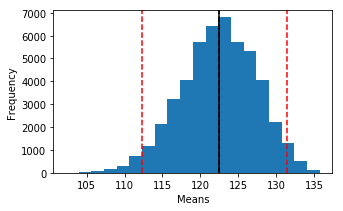

In [9]:
fig, ax  = plt.subplots(1,1, figsize=(5,3))
ax.hist(booted, 20)
ax.axvline(x=np.mean(T1), color='k')
ax.axvline(x=np.mean(booted), color='k', linestyle="dashed")
ax.axvline(x=lower95CI, color='r', linestyle="dashed")
ax.axvline(x=upper95CI, color='r', linestyle="dashed")
ax.set_ylabel("Frequency")
ax.set_xlabel('Means')
print('Black solid line: original sample mean')
print('Black dashed line: bootstrap mean')
print('Red dashed lines: lower and upper 95% confidence limits')